## Данные об игроках NBA 

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [2]:
from pandas_profiling import ProfileReport

In [3]:
nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
#оставляем только числовые признаки
nba = nba[['age','g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']] 

In [5]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


#### Расшифровка некоторых колонок:

player — name of the player

pos — the position of the player

g — number of games the player was in

gs — number of games the player started

pts — total points the player scored

ast - the total number of assists the player had in the season.

fg. - the player's field goal percentage for the season.

подробнее об остальных https://www.basketball-reference.com/about/glossary.html 

## Задание

1) Замените пропуски во всех колонках на медиану с помощью SimpleImputer  (Без этих преобразований алгоритмы кластеризации не будут работать из-за пропусков!)

2) Стандартизируйте все признаки с помощью MinMaxScaler



In [50]:
#Ваш код здесь

Будем работать с преобразованным датасетом.

#### 1) Попробуйте кластеризовать данные при помощи KMeans

- Постройте график инерции (кол-во кластеров от 1 до 10)

- Постройте график силуета (silhoette_score) (кол-во кластеров от 1 до 10)

Определите по методу локтя оптимальное число кластеров

- Постройте график силуета для каждого кластера отдельно, для этого воспользуйтесь функцией clusters_stats



In [ ]:
#Ваш код здесь

### Попробуйте кластеризовать данные при помощи AgglomerativeClustering

In [6]:
nba=nba.fillna(0)

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(nba, method='ward', metric='euclidean')

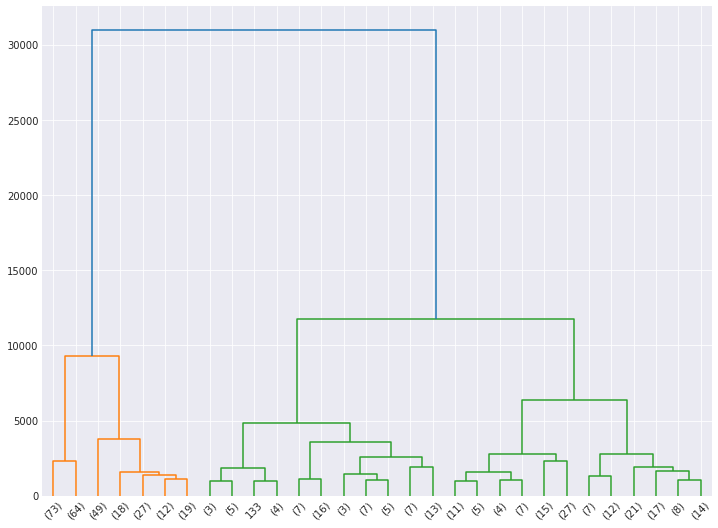

In [8]:
fig, ax = plt.subplots(1, 1)
dend = dendrogram(Z, ax=ax, truncate_mode='lastp') 

In [84]:
Z

array([[2.71000000e+02, 3.97000000e+02, 4.00000000e+00, 2.00000000e+00],
       [1.90000000e+02, 4.61000000e+02, 4.12310563e+00, 2.00000000e+00],
       [1.34000000e+02, 4.60000000e+02, 4.83041293e+00, 2.00000000e+00],
       ...,
       [9.50000000e+02, 9.55000000e+02, 9.27000473e+03, 2.62000000e+02],
       [9.56000000e+02, 9.57000000e+02, 1.17600145e+04, 2.19000000e+02],
       [9.58000000e+02, 9.59000000e+02, 3.09939575e+04, 4.81000000e+02]])

In [85]:
def plot_elbow(Z):
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()

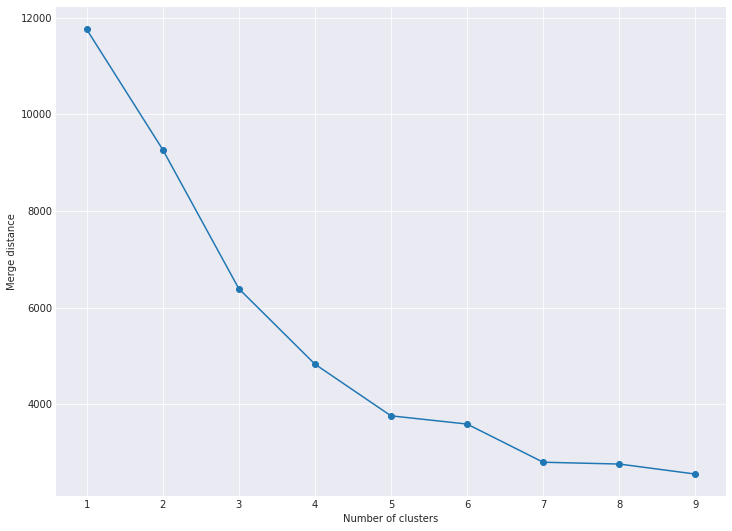

In [89]:
plot_elbow(Z[-10:-1])

In [47]:
from scipy.spatial.distance import pdist

dist = []
for k in range(2, 10):
    ag=AgglomerativeClustering(n_clusters=k).fit(nba)
    dist_n_classes = []
    for y in set(ag.labels_):            
        dist_n_classes.append(pdist(nba.loc[pd.DataFrame(ag.labels_).values==y],'euclidean').mean())
    dist.append(np.array(dist_n_classes).mean())


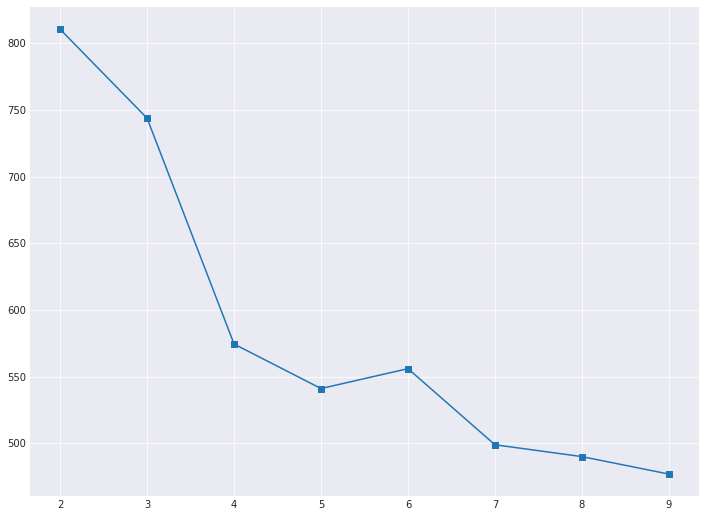

In [48]:
plt.plot(range(2,10),dist, marker='s');

In [18]:
X=np.array([1,2,3,4])

In [25]:
X = [[1, 2,3], [4, 5, 6], [7,8,9]]

In [57]:
n_classes =10
from sklearn.metrics import silhouette_score
silhouette = []
for k in range(2, n_classes+5):
    km=AgglomerativeClustering(n_clusters=k).fit(nba)
    silhouette.append(silhouette_score(nba, km.labels_))

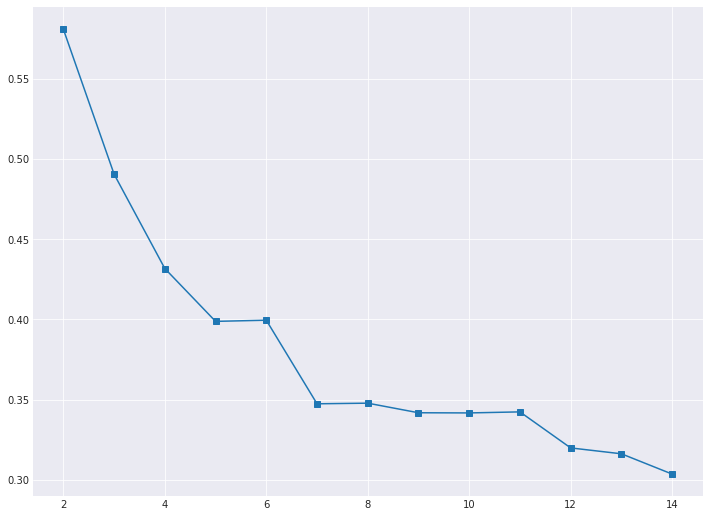

In [58]:
plt.plot(range(2,n_classes + 5),silhouette, marker='s');